Benchmark of VisiumHD dataset (393543x19059)

https://www.jianshu.com/p/7407a8b6c975

In [1]:
import os,sys
sys.path.append(os.path.realpath(os.path.join(os.getcwd(), '..')))
import warnings
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from MuCoSTX.config import config
opt = config()
args = opt.parse_args(['--gpu', '0'])
args.dataset_path = '/mnt/d/Dataset/SRT_Dataset/VHD/'
args.srt_resolution = 50
args.max_neighbors = 8
if args.version.split('-')[0] != 'dev':
    warnings.filterwarnings("ignore")
args

Namespace(amp=True, batch_size=512, clusters=0, dataset_path='/mnt/d/Dataset/SRT_Dataset/VHD/', dropout=0.3, flow='source_to_target', gpu=0, hvgs=3000, latent_dim=64, log_file='../Log', log_steps=20, lr=0.001, max_epoch=100, max_neighbors=8, mode_rknn='rknn', n_spot=0, out_file='../Output', project_name='MoCoSTX', seed=2024, srt_resolution=50, tau=0.05, version='dev-1.0', visual=True, wegiht_decay=0.0001)

In [3]:
from MuCoSTX.utils import set_random_seed
set_random_seed(args.seed)

Unpack（use 8 bins）

In [4]:
# import tarfile
# vhd_dir = args.dataset_path+'Visium_HD_Mouse_Brain_binned_outputs.tar.gz'
# out_dir = args.dataset_path
# with tarfile.open(vhd_dir, 'r:gz') as tar:
#     tar.extractall(path=out_dir)

In [5]:
position_file = args.dataset_path+'binned_outputs/square_008um/spatial/tissue_positions.parquet'
position_csv = args.dataset_path+'binned_outputs/square_008um/spatial/tissue_positions_list.csv'
if  not os.path.exists(position_csv):
    tissue_position_df = pd.read_parquet(position_file)
    tissue_position_df.to_csv(position_csv, index=False, header=None)
adata = sc.read_visium(path = args.dataset_path+'binned_outputs/square_008um')
adata.var_names_make_unique()
adata

/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 393543 × 19059
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [6]:
from  MuCoSTX.mucostx import MuCoSTHD
mx = MuCoSTHD(adata, args)

initial
hvg
hvg1


/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


7.688493885605983
hvg2
pre
spe
pca
knn
Data(x=[358253, 2000], edge_index=[2, 2754426]) Data(x=[358253, 2000], edge_index=[2, 11710751], edge_attr=[11710751])


  0%|          | 0/50 [00:00<?, ?it/s]

x dim 3629, running loss: 609.2684705555439


x dim 3610, running loss: 578.4474936723709
x dim 3610, running loss: 575.2962944507599
x dim 3626, running loss: 571.2363747656345
x dim 3647, running loss: 567.6686755120754
x dim 3633, running loss: 565.032183945179
x dim 3623, running loss: 563.5433574318886
x dim 3637, running loss: 562.2877241075039
x dim 3634, running loss: 562.8586065173149
x dim 3647, running loss: 561.0434949696064
x dim 3630, running loss: 560.5334703922272
x dim 3628, running loss: 560.4154231846333
x dim 3592, running loss: 560.0202772021294
x dim 3624, running loss: 559.5678834915161
x dim 3619, running loss: 559.8407202064991
x dim 3665, running loss: 560.0761879682541
x dim 3620, running loss: 558.140679448843
x dim 3647, running loss: 559.5733342766762
x dim 3633, running loss: 558.9693732857704
x dim 3623, running loss: 559.759639531374
x dim 3638, running loss: 558.84279063344
x dim 3629, running loss: 559.9260901808739
x dim 3624, running loss: 557.4230936765671
x dim 3645, running loss: 558.9838095

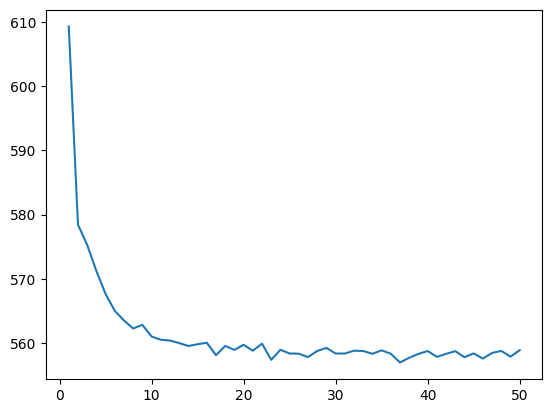

In [7]:
mx.train_emb()

Downstream workflow

In [9]:
adata = mx.get_adata_new()
adata

AnnData object with n_obs × n_vars = 358253 × 2000
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'spatial', 'hvg', 'log1p'
    obsm: 'spatial', 'mx'

In [11]:
from MuCoSTX.utils import mclust
args.n_domain = 16
adata = mclust(adata, args, refine=False, use='mx')

fitting ...
  |======================================================================| 100%


/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


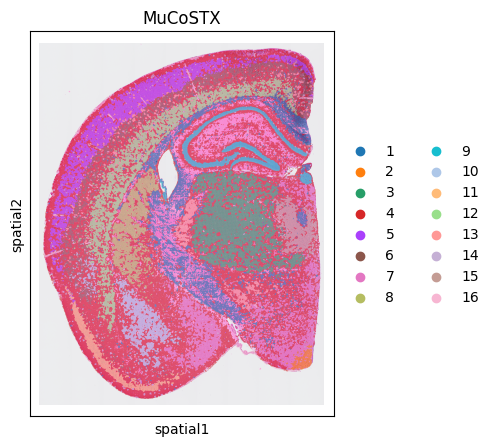

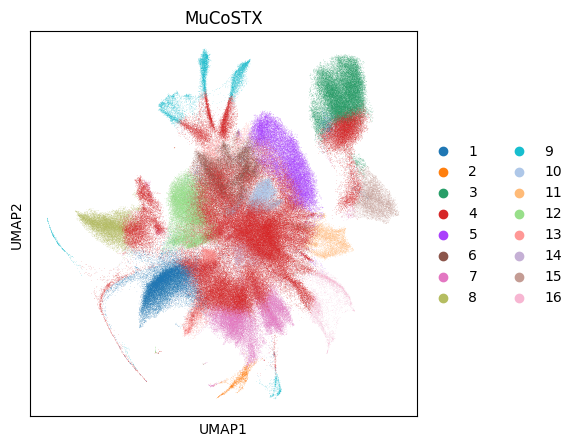

In [19]:
sc.pl.spatial(adata, img_key="hires", color="mclust",title = 'MuCoSTX', size=1, show=False)
sc.pl.umap(adata, color=["mclust"],title = 'MuCoSTX', wspace=1)

/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


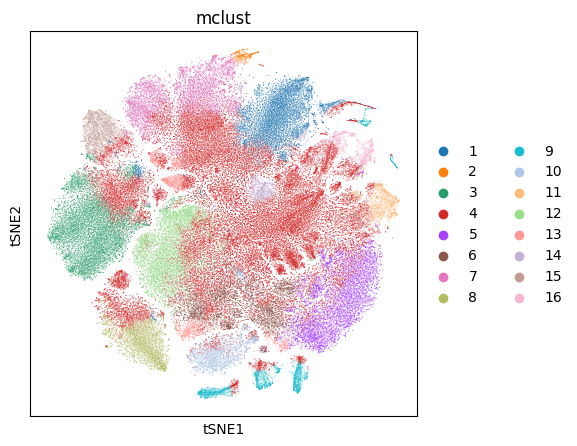

In [20]:
sc.tl.tsne(adata, use_rep='mx')
sc.pl.tsne(adata, color='mclust')

/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


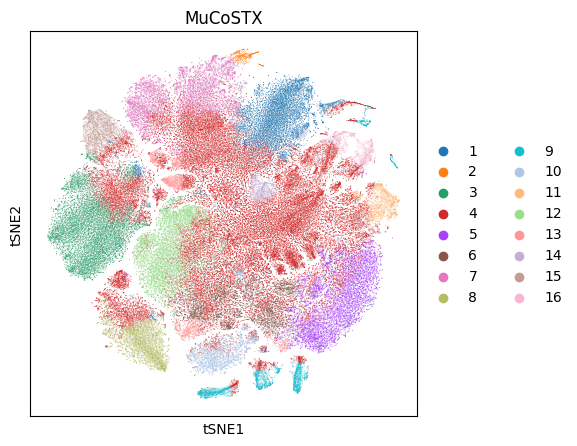

In [21]:
sc.pl.tsne(adata, color='mclust',title = 'MuCoSTX', wspace=1)

/home/zl/anaconda3/envs/pyg/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


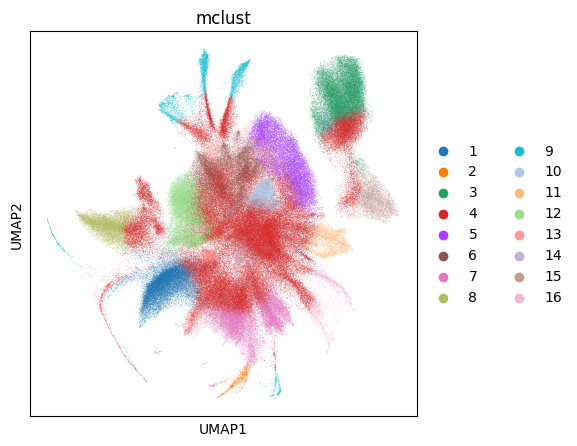

In [14]:
sc.pp.neighbors(adata, use_rep='mx')
sc.tl.umap(adata)
plt.rcParams["figure.figsize"] = (5, 5)
sc.pl.umap(adata, color=["mclust"], wspace=0.4)

In [16]:
adata

AnnData object with n_obs × n_vars = 358253 × 2000
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes', 'mclust'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'spatial', 'hvg', 'log1p', 'mclust_colors', 'neighbors', 'umap'
    obsm: 'spatial', 'mx', 'emb_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

In [ ]:
sc.tl.leiden(adata, key_added="mx", resolution=0.5)
sc.tl.tsne(adata, n_pcs = 30)

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(12, 10), dpi=300)
sc.pl.tsne(adata, color = "mclust", wspace=0.4, title='clustering using tsne', ax = ax[0,0], show=False)
sc.pl.umap(adata, color = "mclust", wspace=0.4, title = 'clustering using umap', ax = ax[0,1], show=False)
point_size = 1
sc.pl.spatial(adata, img_key="hires", color="n_genes_by_counts", size=point_size, ax = ax[1,0], show=False)
sc.pl.spatial(adata, img_key="hires", color="mclust", size=point_size, ax = ax[1,1], show=False)
fig.tight_layout()